[View in Colaboratory](https://colab.research.google.com/github/Bing5154/Summer18/blob/master/MNIST.ipynb)

# Outline

Here we will train a fully-connected network to classify hand-written digits from images using the MNIST dataset

The network will take 28x28 pixel images and map them to digit categories {0, 1, 2, ..., 9}. 

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
accelerator = 'cu90' if path.exists('/opt/bin/nvidia-smi') else 'cpu'
!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

# Load the Dataset (MNIST)


We can use some PyTorch DataLoader utilities for this.  

In [3]:
train_loader = torch.utils.data.DataLoader(
    # transforms the images to tensor (gray scale: 0 - 1)
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                   ])),
    batch_size=64, shuffle=True)  #creates batch size and randomly assign data to each batch
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                   ])),
    batch_size=1000, shuffle=True)


Processing...
Done!


In [5]:
from google.colab import files
uploaded = files.upload() # then browse, select the files. It's then uploaded
# choose plot_conf.py

Saving plot_conf.py to plot_conf.py


In [0]:
%run ~/plot_conf.py
plt_style()

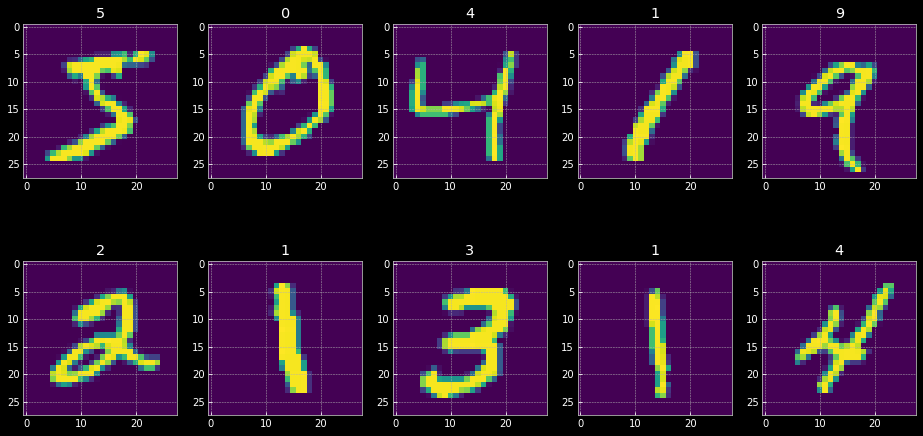

In [8]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image, label = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy())
    plt.title(label.numpy())

In [9]:
print(image.size())
print(image.squeeze().size())

torch.Size([1, 28, 28])
torch.Size([28, 28])


In [13]:
for batch_idx, (data, target) in enumerate(train_loader):
    # Move tensors to the configured device
    print(data.size())
    data = data.reshape(-1,28*28)  # reset to size 1 x 784 
    print(data.size())
    data = data
    target = target  #print out the value pf the dataset
    print(target)
    break



torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
tensor([ 6,  9,  3,  7,  2,  1,  9,  4,  8,  1,  1,  1,  6,  9,
         5,  0,  2,  9,  8,  2,  7,  0,  1,  6,  2,  7,  5,  4,
         4,  8,  1,  5,  8,  3,  1,  9,  1,  5,  0,  1,  4,  1,
         7,  0,  5,  4,  1,  5,  7,  6,  5,  3,  6,  5,  8,  6,
         7,  4,  6,  8,  0,  3,  0,  8])


In [11]:
data.size()
target

tensor([ 2,  8,  5,  6,  4,  7,  7,  5,  9,  6,  0,  8,  2,  9,
         7,  8,  4,  1,  2,  1,  1,  4,  5,  0,  8,  2,  8,  4,
         9,  6,  2,  5,  7,  0,  4,  0,  5,  7,  5,  7,  3,  2,
         0,  9,  4,  1,  6,  9,  4,  5,  8,  8,  2,  6,  2,  1,
         6,  8,  1,  0,  4,  2,  9,  3])